In [1]:
import pickle

# Define the path to your file
file_path = 'predictions.json.pickle'

# Now, let's proceed to unpickle the file
with open(file_path, 'rb') as file:
    data = pickle.load(file)

C:\Users\carhiliuc\Anaconda3\envs\univer\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MultiLabelBinarizer from version 0.23.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [2]:
type(data)

dict

In [3]:
data.keys()

dict_keys(['true_labels', 'predictions', 'labels_name', 'mlb_model'])

In [4]:
from sklearn.metrics import multilabel_confusion_matrix

In [5]:
import numpy as np
y_true = data['mlb_model'].inverse_transform(np.array(data['true_labels']))

In [6]:
y_pred = data['mlb_model'].inverse_transform(np.array(data['predictions']))

In [7]:
conf = multilabel_confusion_matrix(data['true_labels'], data['predictions'])

In [8]:
y_true

[('Computer and information sciences',
  'Economics and business',
  'Media and communications',
  'Other social sciences'),
 ('Earth and related environmental sciences',
  'Environmental engineering',
  'Other social sciences'),
 ('Psychology',),
 ('Basic medicine', 'Biological sciences'),
 ('Basic medicine',
  'Biological sciences',
  'Chemical sciences',
  'Other engineering and technologies'),
 ('Basic medicine', 'Clinical medicine', 'Psychology'),
 ('Basic medicine', 'Biological sciences', 'Health sciences'),
 ('Biological sciences',),
 ('Health sciences', 'Other engineering and technologies'),
 ('Computer and information sciences',
  'Earth and related environmental sciences',
  'Electrical engineering, electronic engineering, information engineering',
  'Environmental engineering'),
 ('Biological sciences',),
 ('Computer and information sciences',
  'Electrical engineering, electronic engineering, information engineering',
  'Physical sciences'),
 ('Chemical sciences',),
 ('Chem

In [9]:
y_pred

[('Computer and information sciences',
  'Economics and business',
  'Electrical engineering, electronic engineering, information engineering'),
 ('Earth and related environmental sciences',
  'Economics and business',
  'Psychology'),
 ('Psychology',),
 ('Biological sciences',),
 ('Basic medicine',
  'Biological sciences',
  'Chemical sciences',
  'Other engineering and technologies'),
 ('Basic medicine', 'Clinical medicine', 'Psychology'),
 ('Basic medicine', 'Biological sciences', 'Health sciences'),
 ('Biological sciences',),
 ('Health sciences', 'Other engineering and technologies'),
 ('Electrical engineering, electronic engineering, information engineering',
  'Environmental engineering',
  'Mechanical engineering'),
 ('Biological sciences',),
 ('Computer and information sciences',
  'Electrical engineering, electronic engineering, information engineering'),
 ('Chemical sciences',),
 ('Chemical sciences',),
 ('Psychology',),
 ('Chemical sciences', 'Mechanical engineering'),
 ('Co

In [10]:
import pandas as pd

In [11]:
df = pd.DataFrame([y_true, y_pred]).T

In [12]:
df.columns = ['y_true', 'y_pred']

In [13]:
df

,y_true,y_pred
0,"(Computer and information sciences, Economics ...","(Computer and information sciences, Economics ..."
1,"(Earth and related environmental sciences, Env...","(Earth and related environmental sciences, Eco..."
2,"(Psychology,)","(Psychology,)"
3,"(Basic medicine, Biological sciences)","(Biological sciences,)"
4,"(Basic medicine, Biological sciences, Chemical...","(Basic medicine, Biological sciences, Chemical..."
...,...,...
415257,"(Sociology,)","(Religion, Sociology)"
415258,"(Art (arts, history of arts, performing arts, ...","(Art (arts, history of arts, performing arts, ..."
415259,"(Art (arts, history of arts, performing arts, ...","(Sociology,)"
415260,"(History, Law, Sociology)","(Political Science, Sociology)"


In [14]:
df['Common'] = df.apply(lambda x: [y for y in x.y_pred if y in x.y_true], axis=1)

In [15]:
df['y_true_modified'] = df.apply(lambda x: [y for y in x.y_true if y not in x.Common], axis=1)

In [16]:
df['y_pred_modified'] = df.apply(lambda x: [y for y in x.y_pred if y not in x.Common], axis=1)

In [17]:
df['y_true_modified_count'] = df.y_true_modified.apply(len)
df['y_pred_modified_count'] = df.y_pred_modified.apply(len)

In [18]:
 df[(df.y_true_modified_count == 0) & (df.y_pred_modified_count == 0)]

,y_true,y_pred,Common,y_true_modified,y_pred_modified,y_true_modified_count,y_pred_modified_count
2,"(Psychology,)","(Psychology,)",[Psychology],[],[],0,0
4,"(Basic medicine, Biological sciences, Chemical...","(Basic medicine, Biological sciences, Chemical...","[Basic medicine, Biological sciences, Chemical...",[],[],0,0
5,"(Basic medicine, Clinical medicine, Psychology)","(Basic medicine, Clinical medicine, Psychology)","[Basic medicine, Clinical medicine, Psychology]",[],[],0,0
6,"(Basic medicine, Biological sciences, Health s...","(Basic medicine, Biological sciences, Health s...","[Basic medicine, Biological sciences, Health s...",[],[],0,0
7,"(Biological sciences,)","(Biological sciences,)",[Biological sciences],[],[],0,0
...,...,...,...,...,...,...,...
415252,"(Mathematics,)","(Mathematics,)",[Mathematics],[],[],0,0
415254,"(Clinical medicine,)","(Clinical medicine,)",[Clinical medicine],[],[],0,0
415255,"(Clinical medicine,)","(Clinical medicine,)",[Clinical medicine],[],[],0,0
415256,"(Basic medicine, Clinical medicine)","(Basic medicine, Clinical medicine)","[Basic medicine, Clinical medicine]",[],[],0,0


In [19]:
df[(~(df.y_true_modified_count == 0)) & (df.y_pred_modified_count == 0)]

,y_true,y_pred,Common,y_true_modified,y_pred_modified,y_true_modified_count,y_pred_modified_count
3,"(Basic medicine, Biological sciences)","(Biological sciences,)",[Biological sciences],[Basic medicine],[],1,0
11,"(Computer and information sciences, Electrical...","(Computer and information sciences, Electrical...","[Computer and information sciences, Electrical...",[Physical sciences],[],1,0
14,"(Clinical medicine, Psychology)","(Psychology,)",[Psychology],[Clinical medicine],[],1,0
18,"(Art (arts, history of arts, performing arts, ...",(),[],"[Art (arts, history of arts, performing arts, ...",[],4,0
21,"(Basic medicine, Biological sciences, Chemical...","(Basic medicine, Chemical sciences)","[Basic medicine, Chemical sciences]",[Biological sciences],[],1,0
...,...,...,...,...,...,...,...
415238,"(Computer and information sciences, Electrical...","(Computer and information sciences, Mathematics)","[Computer and information sciences, Mathematics]","[Electrical engineering, electronic engineerin...",[],1,0
415246,"(Biological sciences, Chemical sciences, Mater...","(Biological sciences, Chemical sciences, Nano-...","[Biological sciences, Chemical sciences, Nano-...","[Materials engineering, Physical sciences]",[],2,0
415250,"(Chemical sciences, Materials engineering, Mec...","(Materials engineering, Nano-technology)","[Materials engineering, Nano-technology]","[Chemical sciences, Mechanical engineering, Ph...",[],3,0
415253,"(Chemical sciences, Environmental engineering,...","(Chemical sciences,)",[Chemical sciences],"[Environmental engineering, Materials engineer...",[],2,0


In [20]:
df_filtered = df[~((df.y_true_modified_count == 0) | (df.y_pred_modified_count == 0))]

In [21]:
df_filtered

,y_true,y_pred,Common,y_true_modified,y_pred_modified,y_true_modified_count,y_pred_modified_count
0,"(Computer and information sciences, Economics ...","(Computer and information sciences, Economics ...","[Computer and information sciences, Economics ...","[Media and communications, Other social sciences]","[Electrical engineering, electronic engineerin...",2,1
1,"(Earth and related environmental sciences, Env...","(Earth and related environmental sciences, Eco...",[Earth and related environmental sciences],"[Environmental engineering, Other social scien...","[Economics and business, Psychology]",2,2
9,"(Computer and information sciences, Earth and ...","(Electrical engineering, electronic engineerin...","[Electrical engineering, electronic engineerin...","[Computer and information sciences, Earth and ...",[Mechanical engineering],2,1
15,"(Chemical sciences, Materials engineering)","(Chemical sciences, Mechanical engineering)",[Chemical sciences],[Materials engineering],[Mechanical engineering],1,1
17,"(Basic medicine, Educational sciences, Health ...","(Biological sciences, Clinical medicine, Educa...","[Educational sciences, Health sciences]",[Basic medicine],"[Biological sciences, Clinical medicine]",1,2
...,...,...,...,...,...,...,...
415241,"(Basic medicine, Psychology)","(Languages and linguistics, Psychology)",[Psychology],[Basic medicine],[Languages and linguistics],1,1
415242,"(Chemical sciences, Materials engineering, Phy...","(Chemical sciences, Earth and related environm...","[Chemical sciences, Materials engineering]",[Physical sciences],"[Earth and related environmental sciences, Env...",1,2
415244,"(Chemical sciences, Materials engineering, Phy...","(Chemical engineering, Chemical sciences)",[Chemical sciences],"[Materials engineering, Physical sciences]",[Chemical engineering],2,1
415259,"(Art (arts, history of arts, performing arts, ...","(Sociology,)",[],"[Art (arts, history of arts, performing arts, ...",[Sociology],2,1


In [22]:
df

,y_true,y_pred,Common,y_true_modified,y_pred_modified,y_true_modified_count,y_pred_modified_count
0,"(Computer and information sciences, Economics ...","(Computer and information sciences, Economics ...","[Computer and information sciences, Economics ...","[Media and communications, Other social sciences]","[Electrical engineering, electronic engineerin...",2,1
1,"(Earth and related environmental sciences, Env...","(Earth and related environmental sciences, Eco...",[Earth and related environmental sciences],"[Environmental engineering, Other social scien...","[Economics and business, Psychology]",2,2
2,"(Psychology,)","(Psychology,)",[Psychology],[],[],0,0
3,"(Basic medicine, Biological sciences)","(Biological sciences,)",[Biological sciences],[Basic medicine],[],1,0
4,"(Basic medicine, Biological sciences, Chemical...","(Basic medicine, Biological sciences, Chemical...","[Basic medicine, Biological sciences, Chemical...",[],[],0,0
...,...,...,...,...,...,...,...
415257,"(Sociology,)","(Religion, Sociology)",[Sociology],[],[Religion],0,1
415258,"(Art (arts, history of arts, performing arts, ...","(Art (arts, history of arts, performing arts, ...","[Art (arts, history of arts, performing arts, ...","[History, Sociology]",[],2,0
415259,"(Art (arts, history of arts, performing arts, ...","(Sociology,)",[],"[Art (arts, history of arts, performing arts, ...",[Sociology],2,1
415260,"(History, Law, Sociology)","(Political Science, Sociology)",[Sociology],"[History, Law]",[Political Science],2,1


In [23]:
same_classification = (df.y_true_modified_count == 0) & (df.y_pred_modified_count == 0)

In [24]:
df[~same_classification]

,y_true,y_pred,Common,y_true_modified,y_pred_modified,y_true_modified_count,y_pred_modified_count
0,"(Computer and information sciences, Economics ...","(Computer and information sciences, Economics ...","[Computer and information sciences, Economics ...","[Media and communications, Other social sciences]","[Electrical engineering, electronic engineerin...",2,1
1,"(Earth and related environmental sciences, Env...","(Earth and related environmental sciences, Eco...",[Earth and related environmental sciences],"[Environmental engineering, Other social scien...","[Economics and business, Psychology]",2,2
3,"(Basic medicine, Biological sciences)","(Biological sciences,)",[Biological sciences],[Basic medicine],[],1,0
9,"(Computer and information sciences, Earth and ...","(Electrical engineering, electronic engineerin...","[Electrical engineering, electronic engineerin...","[Computer and information sciences, Earth and ...",[Mechanical engineering],2,1
11,"(Computer and information sciences, Electrical...","(Computer and information sciences, Electrical...","[Computer and information sciences, Electrical...",[Physical sciences],[],1,0
...,...,...,...,...,...,...,...
415253,"(Chemical sciences, Environmental engineering,...","(Chemical sciences,)",[Chemical sciences],"[Environmental engineering, Materials engineer...",[],2,0
415257,"(Sociology,)","(Religion, Sociology)",[Sociology],[],[Religion],0,1
415258,"(Art (arts, history of arts, performing arts, ...","(Art (arts, history of arts, performing arts, ...","[Art (arts, history of arts, performing arts, ...","[History, Sociology]",[],2,0
415259,"(Art (arts, history of arts, performing arts, ...","(Sociology,)",[],"[Art (arts, history of arts, performing arts, ...",[Sociology],2,1


In [25]:
true_labels_included = df.y_true_modified_count == 0

In [26]:
df[~same_classification & true_labels_included]

,y_true,y_pred,Common,y_true_modified,y_pred_modified,y_true_modified_count,y_pred_modified_count
22,"(Chemical sciences, Materials engineering)","(Chemical sciences, Environmental engineering,...","[Chemical sciences, Materials engineering]",[],"[Environmental engineering, Nano-technology, P...",0,3
25,"(Agriculture, forestry, and fisheries,)","(Agriculture, forestry, and fisheries, Other e...","[Agriculture, forestry, and fisheries]",[],[Other engineering and technologies],0,1
28,"(Basic medicine, Clinical medicine)","(Basic medicine, Clinical medicine, Health sci...","[Basic medicine, Clinical medicine]",[],[Health sciences],0,1
30,"(Biological sciences,)","(Agriculture, forestry, and fisheries, Biologi...",[Biological sciences],[],"[Agriculture, forestry, and fisheries, Earth a...",0,2
33,"(Chemical sciences, Other engineering and tech...","(Chemical sciences, Health sciences, Other eng...","[Chemical sciences, Other engineering and tech...",[],[Health sciences],0,1
...,...,...,...,...,...,...,...
415234,"(Biological sciences, Clinical medicine)","(Basic medicine, Biological sciences, Clinical...","[Biological sciences, Clinical medicine]",[],[Basic medicine],0,1
415243,"(Materials engineering, Physical sciences)","(Chemical sciences, Materials engineering, Nan...","[Materials engineering, Physical sciences]",[],"[Chemical sciences, Nano-technology]",0,2
415247,"(Biological sciences,)","(Basic medicine, Biological sciences, Clinical...",[Biological sciences],[],"[Basic medicine, Clinical medicine]",0,2
415249,"(Chemical sciences,)","(Chemical engineering, Chemical sciences, Envi...",[Chemical sciences],[],"[Chemical engineering, Environmental engineeri...",0,4


In [27]:
predicted_labels_included = df.y_pred_modified_count == 0

In [28]:
df[~same_classification & predicted_labels_included]

,y_true,y_pred,Common,y_true_modified,y_pred_modified,y_true_modified_count,y_pred_modified_count
3,"(Basic medicine, Biological sciences)","(Biological sciences,)",[Biological sciences],[Basic medicine],[],1,0
11,"(Computer and information sciences, Electrical...","(Computer and information sciences, Electrical...","[Computer and information sciences, Electrical...",[Physical sciences],[],1,0
14,"(Clinical medicine, Psychology)","(Psychology,)",[Psychology],[Clinical medicine],[],1,0
18,"(Art (arts, history of arts, performing arts, ...",(),[],"[Art (arts, history of arts, performing arts, ...",[],4,0
21,"(Basic medicine, Biological sciences, Chemical...","(Basic medicine, Chemical sciences)","[Basic medicine, Chemical sciences]",[Biological sciences],[],1,0
...,...,...,...,...,...,...,...
415238,"(Computer and information sciences, Electrical...","(Computer and information sciences, Mathematics)","[Computer and information sciences, Mathematics]","[Electrical engineering, electronic engineerin...",[],1,0
415246,"(Biological sciences, Chemical sciences, Mater...","(Biological sciences, Chemical sciences, Nano-...","[Biological sciences, Chemical sciences, Nano-...","[Materials engineering, Physical sciences]",[],2,0
415250,"(Chemical sciences, Materials engineering, Mec...","(Materials engineering, Nano-technology)","[Materials engineering, Nano-technology]","[Chemical sciences, Mechanical engineering, Ph...",[],3,0
415253,"(Chemical sciences, Environmental engineering,...","(Chemical sciences,)",[Chemical sciences],"[Environmental engineering, Materials engineer...",[],2,0


In [29]:
df_filtered = df[~same_classification & ~predicted_labels_included & ~true_labels_included]

In [30]:
df_filtered

,y_true,y_pred,Common,y_true_modified,y_pred_modified,y_true_modified_count,y_pred_modified_count
0,"(Computer and information sciences, Economics ...","(Computer and information sciences, Economics ...","[Computer and information sciences, Economics ...","[Media and communications, Other social sciences]","[Electrical engineering, electronic engineerin...",2,1
1,"(Earth and related environmental sciences, Env...","(Earth and related environmental sciences, Eco...",[Earth and related environmental sciences],"[Environmental engineering, Other social scien...","[Economics and business, Psychology]",2,2
9,"(Computer and information sciences, Earth and ...","(Electrical engineering, electronic engineerin...","[Electrical engineering, electronic engineerin...","[Computer and information sciences, Earth and ...",[Mechanical engineering],2,1
15,"(Chemical sciences, Materials engineering)","(Chemical sciences, Mechanical engineering)",[Chemical sciences],[Materials engineering],[Mechanical engineering],1,1
17,"(Basic medicine, Educational sciences, Health ...","(Biological sciences, Clinical medicine, Educa...","[Educational sciences, Health sciences]",[Basic medicine],"[Biological sciences, Clinical medicine]",1,2
...,...,...,...,...,...,...,...
415241,"(Basic medicine, Psychology)","(Languages and linguistics, Psychology)",[Psychology],[Basic medicine],[Languages and linguistics],1,1
415242,"(Chemical sciences, Materials engineering, Phy...","(Chemical sciences, Earth and related environm...","[Chemical sciences, Materials engineering]",[Physical sciences],"[Earth and related environmental sciences, Env...",1,2
415244,"(Chemical sciences, Materials engineering, Phy...","(Chemical engineering, Chemical sciences)",[Chemical sciences],"[Materials engineering, Physical sciences]",[Chemical engineering],2,1
415259,"(Art (arts, history of arts, performing arts, ...","(Sociology,)",[],"[Art (arts, history of arts, performing arts, ...",[Sociology],2,1


In [31]:
import json
with open('../discipline_structure.json', 'r') as f:
    data = json.load(f)
data_simplified = {key1: list(value.keys()) for key1, value in data.items()}
data_simplified_reversed = {el:key for key, value in data_simplified.items() for el in value}

In [32]:
df_filtered['y_true_modified_area'] = df_filtered.y_true_modified.apply(lambda x: {data_simplified_reversed[el.lower()] if not el.startswith('Art ') else data_simplified_reversed[el.lower().replace('art ','arts ')] for el in x})

<ipython-input-32-474ab88c251e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['y_true_modified_area'] = df_filtered.y_true_modified.apply(lambda x: {data_simplified_reversed[el.lower()] if not el.startswith('Art ') else data_simplified_reversed[el.lower().replace('art ','arts ')] for el in x})


In [33]:
df_filtered['y_pred_modified_area'] = df_filtered.y_pred_modified.apply(lambda x: {data_simplified_reversed[el.lower()] if not el.startswith('Art ') else data_simplified_reversed[el.lower().replace('art ','arts ')] for el in x})

<ipython-input-33-7892ae97a742>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['y_pred_modified_area'] = df_filtered.y_pred_modified.apply(lambda x: {data_simplified_reversed[el.lower()] if not el.startswith('Art ') else data_simplified_reversed[el.lower().replace('art ','arts ')] for el in x})


In [34]:
df_filtered['combinations'] = df_filtered.apply(lambda instance: [(x, y) for x in instance.y_true_modified_area for y in instance.y_pred_modified_area], axis=1)

<ipython-input-34-690e4bb65fa9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['combinations'] = df_filtered.apply(lambda instance: [(x, y) for x in instance.y_true_modified_area for y in instance.y_pred_modified_area], axis=1)


In [35]:
df_filtered_exploded = df_filtered.explode('combinations')

In [36]:
combinations_x = df_filtered_exploded.combinations.apply(lambda x: x[0])
combinations_y = df_filtered_exploded.combinations.apply(lambda x: x[1])

In [37]:
combinations_x

0                    social sciences
1         engineering and technology
1                    social sciences
9                   natural sciences
15        engineering and technology
                     ...            
415244    engineering and technology
415244              natural sciences
415259                    humanities
415260                    humanities
415260               social sciences
Name: combinations, Length: 68911, dtype: object

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [44]:
np.unique(y_true)

array(['agricultural sciences', 'engineering and technology',
       'humanities', 'medical and health sciences', 'natural sciences',
       'social sciences'], dtype=object)

In [45]:
label_order = ['natural sciences', 'engineering and technology', 'medical and health sciences', 'agricultural sciences', 'social sciences', 'humanities']

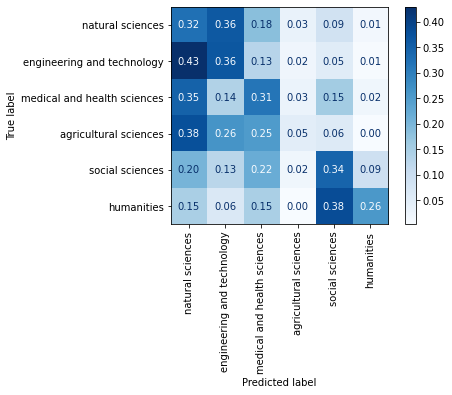

In [46]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming combinations_x are your predictions and combinations_y are the true labels
y_true = combinations_y
y_pred = combinations_x

# Step 1: Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=label_order)

# Step 2: Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Step 3: Display the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=label_order)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical', values_format='.2f') # values_format for percentage

plt.show()

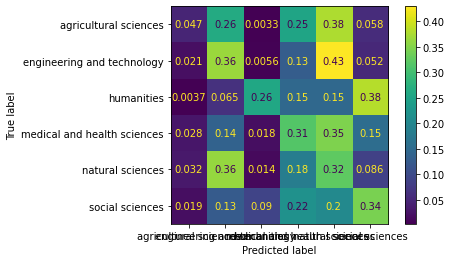

In [40]:
disp.plot()
plt.show()

In [41]:
confusion_matrix(combinations_x.values, combinations_y.values, labels=list(data.keys()))

array([[  129,   532,     7,   302,   570,   187],
       [  717,  9419,   123,  1455,  6419,  1269],
       [    9,   144,   488,   195,   242,   914],
       [  685,  3311,   279,  3341,  3250,  2205],
       [ 1027, 11093,   280,  3676,  5716,  2061],
       [  158,  1354,   726,  1645,  1519,  3464]], dtype=int64)

In [42]:
data

{'agricultural sciences': {'agriculture, forestry, and fisheries': {'description': 'Agriculture; Forestry; Fishery; Soil science; Horticulture, viticulture; Agronomy, plant breeding and plant protection',
   'abstracts': ['Conclusion: Among herbicidal treatments, the highest nutrient content, nutrient uptake, productivity, net returns and benefit cost ratio in pigeon pea were observed in the pre-emergence application of pendimethalin + imazethapyr @ 1000 + 75 g ha(-1). Therefore, this treatment may be an effective and profitable alternative to the existing manual and costlier recommendation (two hoeing at 25 and 45 DAS) of weed control in pigeon pea in Haryana locality.',
    '(NH4)(2)S2O3 or its mixt. with (NH4PO3)N were added to urea-NH4NO3 fertilizer to reduce NH3 emissions. The redn. of NH3 losses was 35-39% for (NH4)(2)S2O3 and 55-70% for the addn. of (NH4)(2)S2O3-(NH4PO3)N mixt. when compared to the fertilizer without additives.',
    "The method of extracting nematodes from the 

In [43]:
disp.figure_.savefig('confusion_matrix.png', bbox_inches='tight')